In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [4]:
data = pd.read_csv('/Users/alksnk/Downloads/covid-vaccination-doses-per-capita.csv')

# Find the rows with the maximum values in a column for each group
max_rows = data.loc[data.groupby('Entity')['total_vaccinations_per_hundred'].idxmax()]

# Sort the dataframe by a column in descending order
sorted_data = max_rows.sort_values('total_vaccinations_per_hundred', ascending=False)

# Select the first 100 rows
subset = sorted_data.head(11)

# Drop the remaining rows
subset = subset.reset_index(drop=True)

# Display the subset of the data
print(subset)

       Entity Code         Day  total_vaccinations_per_hundred
0   Gibraltar  GIB  2022-12-16                          406.43
1        Cuba  CUB  2023-02-25                          389.33
2       Chile  CHL  2023-02-08                          319.78
3       Japan  JPN  2023-02-26                          308.08
4      Brunei  BRN  2023-02-10                          287.09
5     Tokelau  TKL  2022-12-05                          283.89
6       Qatar  QAT  2023-02-19                          282.24
7    Guernsey  GGY  2022-12-19                          281.90
8      Taiwan  TWN  2023-02-23                          280.39
9   Hong Kong  HKG  2023-02-19                          276.16
10   Cambodia  KHM  2023-02-17                          275.04


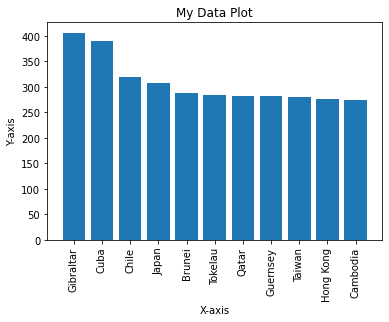

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('/Users/alksnk/Downloads/covid-vaccination-doses-per-capita.csv')

# Create a line plot using matplotlib
plt.bar(subset['Entity'], subset['total_vaccinations_per_hundred'])
plt.xticks(rotation='vertical')
plt.title('My Data Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

Accuracy:  -0.01940350583714734


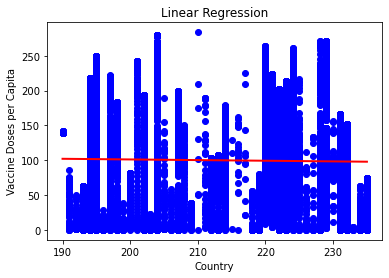

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


# label encode the 'Country' column
le = LabelEncoder()
data['Entity'] = le.fit_transform(data['Entity'])

# extract the relevant columns into X and y variables
X = data['Entity'].values.reshape(-1, 1)  # reshape to a 2D array
y = data['total_vaccinations_per_hundred'].values.reshape(-1, 1)

# split your dataset into training and testing sets
split_ratio = 0.8 # 80% training, 20% testing
split_index = int(len(X) * split_ratio)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# perform linear regression on the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# make predictions on the testing data
y_pred = regressor.predict(X_test)

# calculate the accuracy of the model using R-squared score
accuracy = r2_score(y_test, y_pred)

# print the accuracy of the model
print("Accuracy: ", accuracy)

# plot the results
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Country')
plt.ylabel('Vaccine Doses per Capita')
plt.show()